In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_col = ["sentence","brand_name","info","index","content","total","thank_you"]
y_col = ["brand_name","info","index","content","total","thank_you"]


In [120]:
train_df = pd.read_csv('31-07-vigroupped.csv',   encoding='utf-8')
train_df.head()

,sentence,brand_name,info,index,content,total,thank_you
0,DT: 0903915144,0,1,0,0,0,0
1,FC GOOD COFEE,1,0,0,0,0,0
2,"ĐC: 126 Lai Hùng Cường, Vĩnh Lọc B,",0,1,0,0,0,0
3,"Bình Chánh, TpHCM",0,1,0,0,0,0
4,ĐT: 0934145879,0,1,0,0,0,0


In [121]:
def count_pandas(df,row):
    new_pandas = df.query(row+">0")
    return new_pandas.shape[0]

# count_pandas(train_df,"info")

In [122]:
# Delete same data
# delete_data = []
# for index, row in train_df.iterrows():
#     sentence = row['sentence']
#     for i,r in train_df.iterrows():
#         if i!= index:
#             if r['sentence'] == sentence:
#                 delete_data.append(i)
#                 print("=====")
#                 print(row['sentence'])
#                 print(r['sentence'])

In [123]:
# # delete data
# delete_data = list(set(delete_data))

# org_train_df = train_df
# org_delete_data = delete_data
# delete_data = []
# for i in org_delete_data:
#     delete_data.append(int(i))
# # for index in delete_data:
# #     train_df.drop[train_df.loc(int(index))]
# # print(len(delete_data))
# # print(delete_data)
# train_df = train_df.drop(delete_data)

In [124]:
# train_df.to_csv("31-07-vigroupped.csv", index = False,  encoding='utf-8')

In [125]:
# df.query("brand_name>0")

[33, 176, 59, 216, 131, 39]


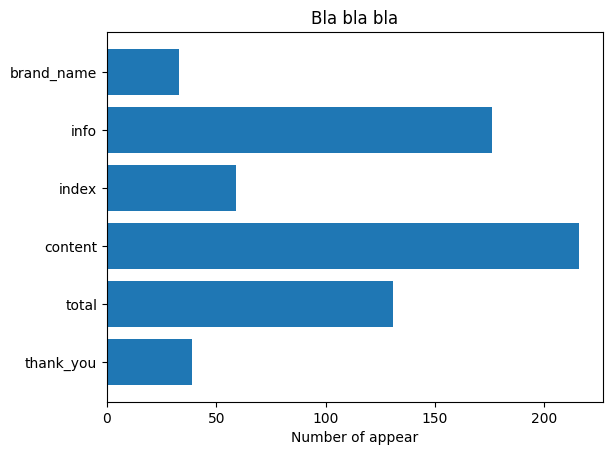

In [126]:
# Explore data
plt.rcdefaults()
fig, ax = plt.subplots()
# Example data

y_pos = np.arange(len(y_col))
performance = []

for col in y_col:
    performance.append(count_pandas(train_df,col))

print(performance)
error = np.random.rand(len(y_col))

ax.barh(y_col, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_col)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of appear')
ax.set_title('Bla bla bla')

plt.show()

In [127]:
import numpy as np
import os
import pickle
from keras.optimizers import SGD, Adam, Nadam, RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.preprocessing import sequence
from keras.models import Sequential,Model,load_model
from keras.layers import Embedding,Conv1D,MaxPooling1D
from keras.layers.core import Dense, Activation,Dropout ,Flatten
from keras.layers.recurrent import LSTM
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence,one_hot,Tokenizer
from keras.constraints import maxnorm
from keras.callbacks import ModelCheckpoint,TensorBoard, ReduceLROnPlateau,EarlyStopping
from keras.applications import Xception
from keras import regularizers
from keras import backend as K
import keras
import numpy as np
import pandas as pd
import cv2
import os
import glob
import math
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [128]:
seed = 120
np.random.seed(seed)
train_df = shuffle(train_df)
train_df.head()

,sentence,brand_name,info,index,content,total,thank_you
83,"nhẫn hoa oil nấm 1x 55,000 (10%) 49,500",0,0,0,1,0,0
389,1 Ca phe đá 1 cốc 100.000 100.000,0,0,0,1,0,0
152,T.CONG 3.0 95.000,0,0,0,0,1,0
370,môn-M,0,0,0,1,0,0
39,"3x 2,000,000 6,000,000",0,0,0,1,0,0


In [129]:
X_train = train_df["sentence"].fillna("fillna").values
Y_train = train_df[['brand_name', 'info', 'index', 'content', 'total', 'thank_you']].values

In [130]:
print("Shape of X_train:",X_train.shape)
print("Shape of Y_train:",Y_train.shape)

Shape of X_train: (654,)
Shape of Y_train: (654, 6)


In [131]:
Tokenizer = Tokenizer()
print(X_train[0])
print("(Input->Sentence) Length of X_train:",X_train.shape) # Input -> Input
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labels
texts = X_train
print(texts[1])

nhẫn hoa oil nấm 1x 55,000 (10%) 49,500
(Input->Sentence) Length of X_train: (654,)
(output->Labels) Length of Y_train: (654, 6)
1 Ca phe đá  1 cốc 100.000 100.000


In [132]:
Tokenizer.fit_on_texts(texts) 
Tokenizer_vocab_size = len(Tokenizer.word_index) + 1
print("Tokenizer vocabulary size:",Tokenizer_vocab_size)
len(max(X_train,key=len))


Tokenizer vocabulary size: 1222


45

In [133]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)
print("(Input->Sentence) Length of X_train:",X_train.shape) # Input -> Input
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labels

(Input->Sentence) Length of X_train: (523,)
(output->Labels) Length of Y_train: (523, 6)


In [134]:
X_train_encoded_words = Tokenizer.texts_to_sequences(X_train)
X_val_encoded_words = Tokenizer.texts_to_sequences(X_val)

In [135]:
print(X_train[2])
print(X_train_encoded_words[2])
print(Tokenizer.word_index)

HB: 0002
[208, 409]
{'000': 1, '1': 2, 'sl': 3, 'hàng': 4, 'tiền': 5, '0': 6, 't': 7, 'giá': 8, '10': 9, 'khách': 10, '2': 11, '30': 12, '5': 13, 'tên': 14, '00': 15, 'giờ': 16, '100': 17, 'đơn': 18, '4': 19, '60': 20, '20': 21, 'sữa': 22, '17': 23, '25': 24, 'mặt': 25, '45': 26, 'ngày': 27, 'lại': 28, '3': 29, 'trà': 30, '500': 31, 'tien': 32, 'thành': 33, '12': 34, '19': 35, '95': 36, '6': 37, 'tiên': 38, '35': 39, 'hoa': 40, '40': 41, '15': 42, '50': 43, 'ơn': 44, 'cam': 45, 'số': 46, 'trả': 47, 'xin': 48, 'quý': 49, '13': 50, 'hà': 51, '22': 52, 'ca': 53, 'ban': 54, '—': 55, '8': 56, 'thanh': 57, 'tổng': 58, 'rm': 59, 'phê': 60, '80': 61, 'đ': 62, 'on': 63, 'gặp': 64, '05': 65, 'tra': 66, 'đgiá': 67, '90': 68, 'don': 69, 'cafe': 70, 'hen': 71, 'thu': 72, 'dgia': 73, '28': 74, 'lai': 75, 'gap': 76, '01': 77, 'cốc': 78, '23': 79, 'giam': 80, 'toán': 81, 'cà': 82, 'công': 83, '2018': 84, '2017': 85, 'hai': 86, 'tươi': 87, '36': 88, 'dt': 89, '150': 90, '55': 91, 'nam': 92, 'nước': 93,

In [136]:
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labelsprint("(Input->Sentence)

(output->Labels) Length of Y_train: (523, 6)


In [137]:
maxWordCount= 450
maxDictionary_size=Tokenizer_vocab_size
X_train_encoded_padded_words = sequence.pad_sequences(X_train_encoded_words, maxlen=maxWordCount)
X_val_encoded_padded_words = sequence.pad_sequences(X_val_encoded_words, maxlen=maxWordCount)

In [138]:
print("(Input->Sentence) Length of X_train:",X_train_encoded_padded_words.shape) # Input -> Input
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labels

(Input->Sentence) Length of X_train: (523, 450)
(output->Labels) Length of Y_train: (523, 6)


In [139]:
print(Y_train.shape)
print(Y_val.shape)

(523, 6)
(131, 6)


In [140]:
# Model

model = Sequential()

model.add(Embedding(maxDictionary_size, 32, input_length=maxWordCount)) #to change words to ints
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.5))
# model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
 #hidden layers
model.add(LSTM(10))
# model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(1200, activation='relu',W_constraint=maxnorm(1)))
# model.add(Dropout(0.6))
model.add(Dense(500, activation='relu',W_constraint=maxnorm(1)))

# model.add(Dropout(0.5))
 #output layer
model.add(Dense(6, activation='softmax'))

# Compile model
# adam=Adam(lr=learning_rate, beta_1=0.7, beta_2=0.999, epsilon=1e-08, decay=0.0000001)

model.summary()

W0811 21:35:11.493688 4657165760 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 450, 32)           39104     
_________________________________________________________________
lstm_5 (LSTM)                (None, 10)                1720      
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1200)              13200     
_________________________________________________________________
dense_14 (Dense)             (None, 500)               600500    
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 3006      
Total params: 657,530
Trainable params: 657,530
Non-trainable params: 0
_________________________________________________________________


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1200, activation="relu", kernel_constraint=<keras.con...)`
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, activation="relu", kernel_constraint=<keras.con...)`


In [141]:
learning_rate=0.0001
epochs = 25
batch_size = 32 #32
sgd = SGD(lr=learning_rate, nesterov=True, momentum=0.7, decay=1e-4)
Nadam = keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)
model.compile(loss='categorical_crossentropy', optimizer=Nadam, metrics=['accuracy'])

In [142]:
print(X_train_encoded_padded_words.shape)
print(Y_train.shape)

print(X_val_encoded_padded_words.shape)
print(Y_val.shape)

(523, 450)
(523, 6)
(131, 450)
(131, 6)


In [143]:
history  = model.fit(X_train_encoded_padded_words,Y_train, epochs = epochs, batch_size=batch_size, verbose=1,
validation_data=(X_val_encoded_padded_words, Y_val))

Train on 523 samples, validate on 131 samples
Epoch 1/25
523/523 [==============================] - 6s 11ms/step - loss: 1.6388 - acc: 0.3212 - val_loss: 1.3787 - val_acc: 0.5344
Epoch 2/25
523/523 [==============================] - 4s 8ms/step - loss: 1.3379 - acc: 0.4570 - val_loss: 0.9611 - val_acc: 0.6107
Epoch 3/25
523/523 [==============================] - 4s 7ms/step - loss: 1.0444 - acc: 0.5985 - val_loss: 0.9650 - val_acc: 0.6183
Epoch 4/25
523/523 [==============================] - 4s 8ms/step - loss: 0.8178 - acc: 0.6673 - val_loss: 0.8008 - val_acc: 0.6489
Epoch 5/25
523/523 [==============================] - 4s 7ms/step - loss: 0.6623 - acc: 0.7266 - val_loss: 0.8036 - val_acc: 0.7176
Epoch 6/25
523/523 [==============================] - 4s 7ms/step - loss: 0.5930 - acc: 0.7591 - val_loss: 0.7693 - val_acc: 0.7252
Epoch 7/25
523/523 [==============================] - 4s 7ms/step - loss: 0.5044 - acc: 0.7973 - val_loss: 0.7910 - val_acc: 0.7481
Epoch 8/25
523/523 [=========

In [144]:
score = model.evaluate(X_val_encoded_padded_words, Y_val, verbose=1)
print('Test accuracy:', score[1],'%')

131/131 [==============================] - 0s 978us/step
Test accuracy: 0.7557251908396947 %


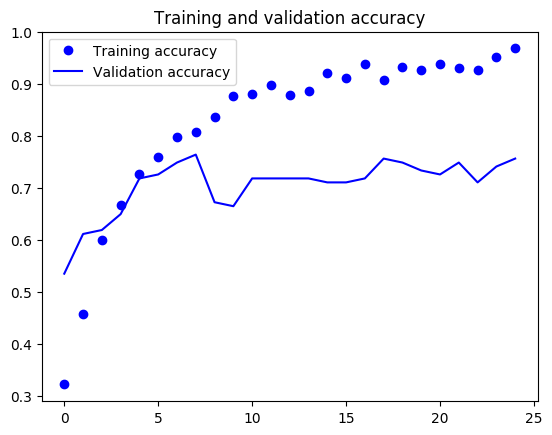

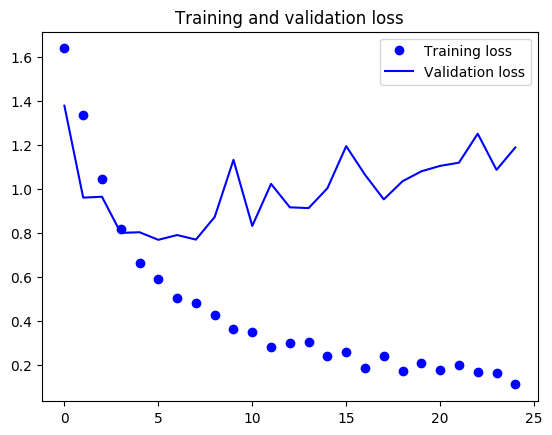

In [145]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [150]:
phrase = "CIRCLE K VN"
tokens = Tokenizer.texts_to_sequences([phrase])
tokens = pad_sequences(tokens, maxlen=450)
prediction = model.predict(np.array(tokens))
i_raw,j_raw = np.where(prediction == prediction.max()) #calculates the index of the maximum element of the array across all axis
# i->rows, j->columns
i = int(i_raw)
j = int(j_raw)
print(prediction[0][j])
print(j_raw)
total_possible_outcomes = ['brand_name', 'info', 'index', 'content', 'total', 'thank_you']
print("Result:",total_possible_outcomes[j])

0.5920387
[0]
Result: brand_name


In [151]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(Tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

Saved model to disk
